# Task 4 - Time-delay Embedding

In [1]:
import numpy as np
import random

from scipy.integrate import odeint
from scipy.spatial import distance

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## 1st Part - Embedding a periodic signal

Let's load the dataset:

In [2]:
periodic_dataset = np.loadtxt("data/takens_1.txt")
print(periodic_dataset.shape)

(1000, 2)


In [3]:
periodic_dataset

array([[ 2.16837096, -0.54631259],
       [ 2.17981061, -0.53247518],
       [ 2.19002807, -0.51894034],
       ...,
       [ 2.14086777, -0.5761134 ],
       [ 2.15555144, -0.56069056],
       [ 2.16853679, -0.54611965]])

After loading the set, let's plot its first coordinate against the time, which here is the length of the dataset:

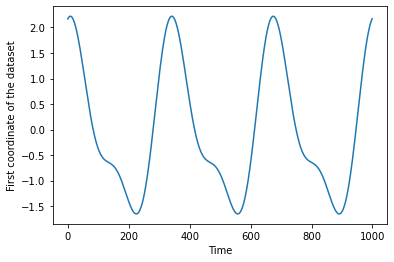

In [4]:
time = range(len(periodic_dataset))

plt.plot(time, periodic_dataset[:,0])
plt.xlabel("Time")
plt.ylabel("First coordinate of the dataset")

plt.show()

We introduce the delay $\Delta n$ here. We take the first $\Delta n$ of rows each time and try to see that how many rows do we need to visualize that the periodic manifold is embedded correctly.

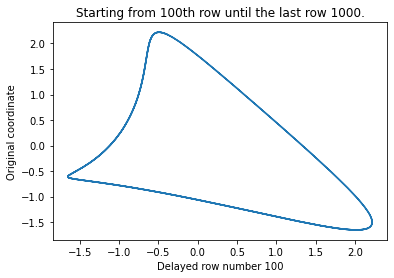

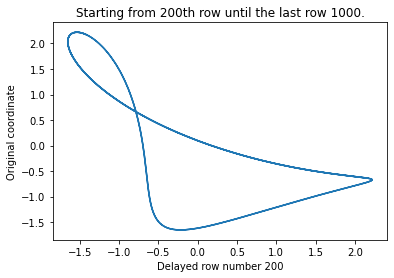

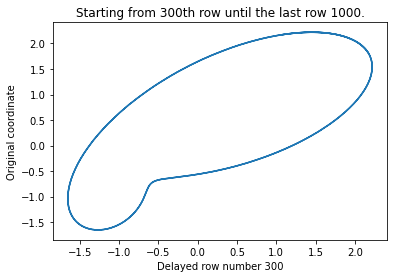

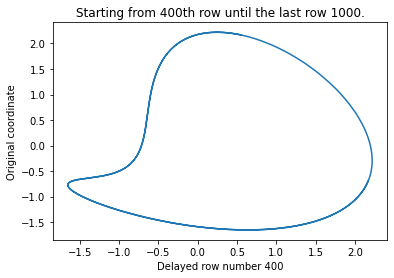

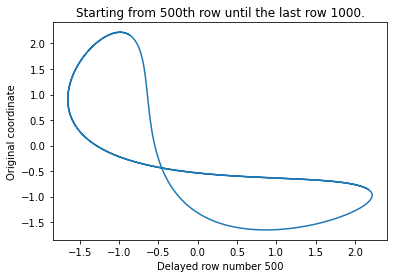

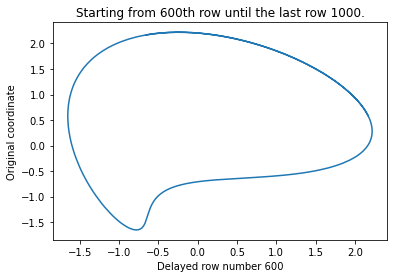

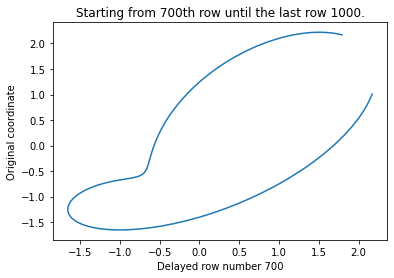

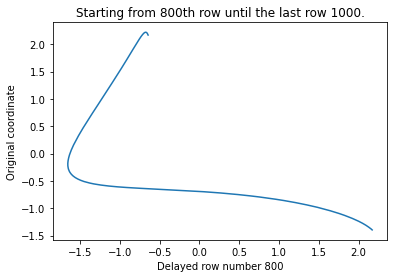

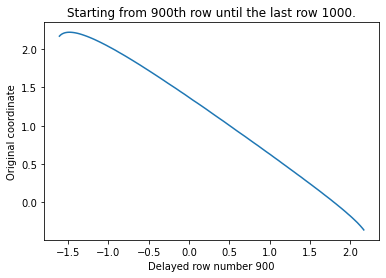

In [5]:
interval = 10

# First I've tried the deltas of 50, but 100 is a more proper value to see the result.
for i in range(9):
    delta = interval * (i + 1) * 10
    plt.title(f"Starting from {delta}th row until the last row {len(periodic_dataset)}.")
    plt.plot(periodic_dataset[delta:, 0], periodic_dataset[:len(periodic_dataset) - delta, 0])
    plt.xlabel(f"Delayed row number {delta}")
    plt.ylabel("Original coordinate")
    plt.show()

As we can clearly see, we can capture the embedding correctly by using $\Delta n = 300$ to see the curvature at $(-0.5, -0.5)$. Also we can see the same embedding after we apply the delay $\Delta n = 600$.

## 2nd Part - Approximating chaotic dynamics

We've copied our Lorenz Attractor code from Exercise 3, Task 4 and we will modify it in order to work with the fractal set.

In [6]:
# Parameters
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    global rho, sigma, beta
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

def simulation(r, s, b, time = np.arange(0.0, 100, 0.01), st_init=[10, 10, 10], ax=None):
    
    global rho, sigma, beta
    rho = r
    sigma = s
    beta = b
    
    states = odeint(f, st_init, time)

    ax.plot(states[:, 0], states[:, 1], states[:, 2], color='b', alpha=0.6)

    # Starting point for the first case [10, 10, 10]
    ax.plot([st_init[0]], [st_init[1]], [st_init[2]], 'ok', ms=7, color='g', alpha=0.7)

    # Ending point for the first case
    ax.plot([states[int(states.size/3) - 1][0]],
            [states[int(states.size/3) - 1][1]],
            [states[int(states.size/3) - 1][2]], 'ok', ms=8, color='r', alpha=0.7)
    
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    
    return states

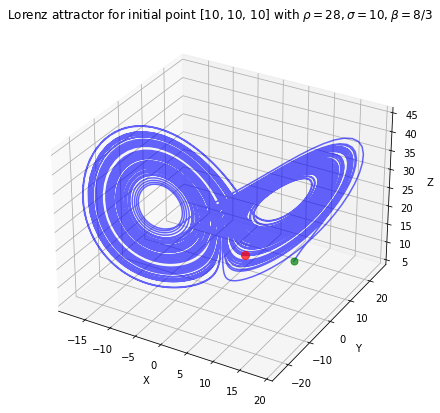

In [7]:
fig = plt.figure(figsize=(15, 15))

# Starting point for the initial point [10, 10, 10]
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
states = simulation(rho, sigma, beta, ax=ax0)
ax0.title.set_text(r"Lorenz attractor for initial point [10, 10, 10] with ${\rho = 28}, {\sigma=10}, {\beta=8/3}$")

We assume we only have access to the x coordinates and we don't know anything about the y and z. We select the $\Delta t$ values in the range from 1 to 15. At initial, we can see that for $\Delta t = 0$, $x_1(t) = x_2( t + \Delta t) = x_3 = ( t + 2 \Delta t)$. And each change of the delta value, we're basically taking appopriate interval from the states.

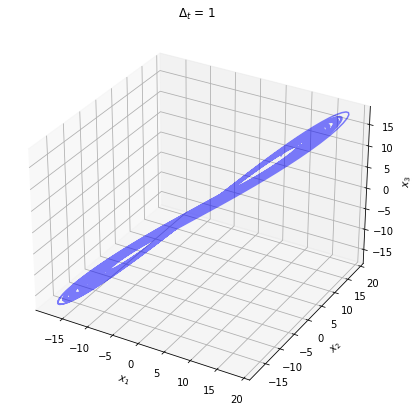

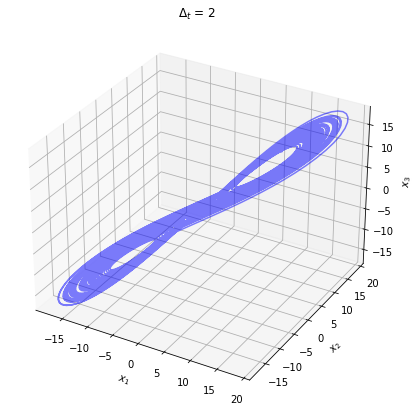

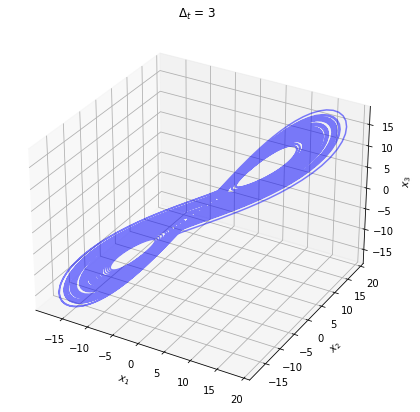

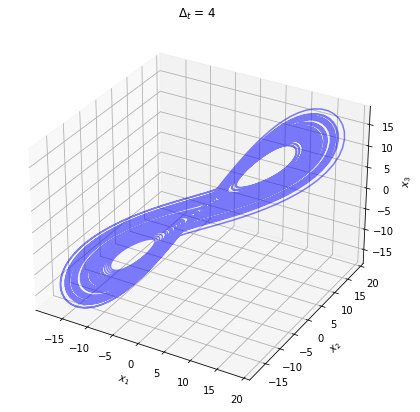

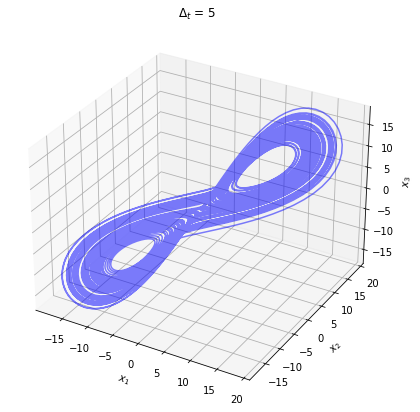

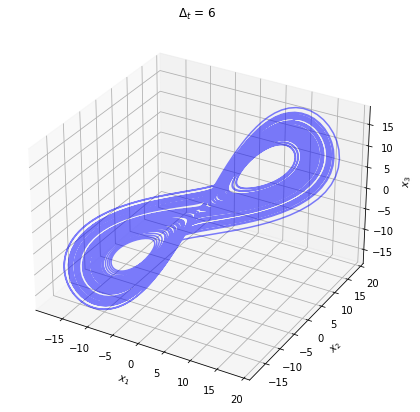

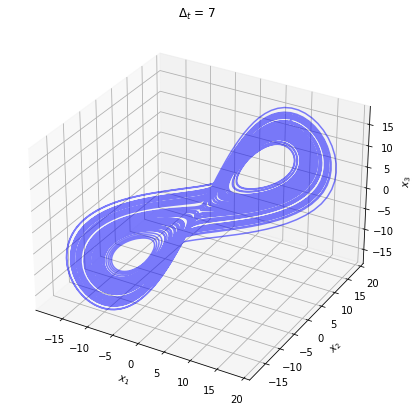

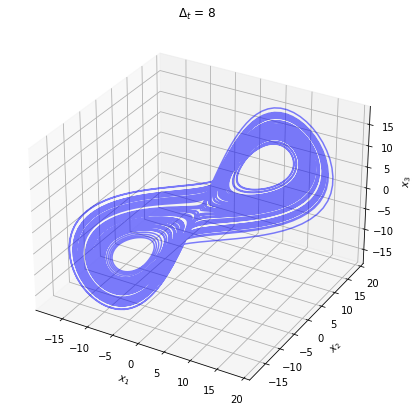

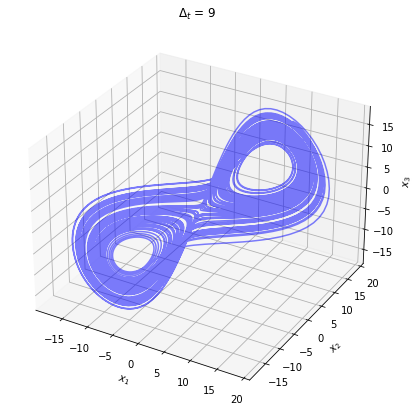

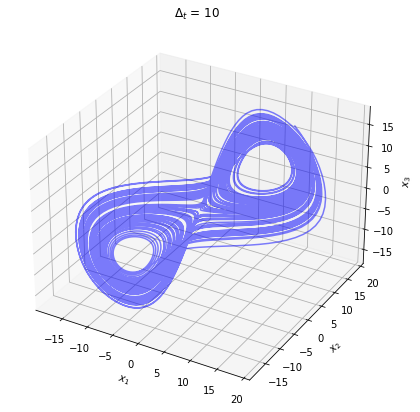

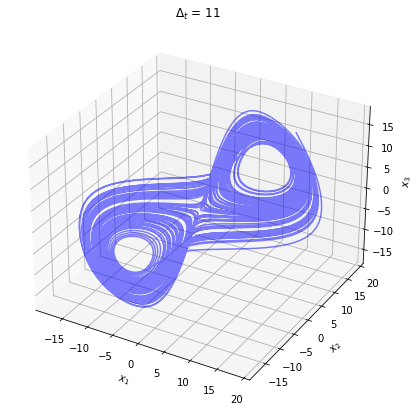

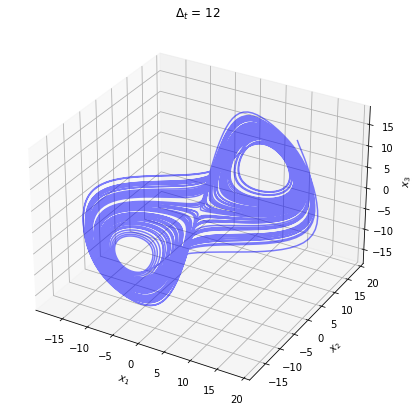

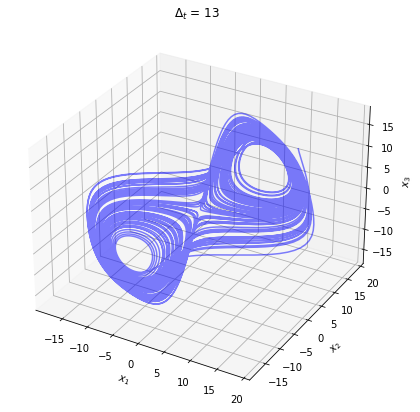

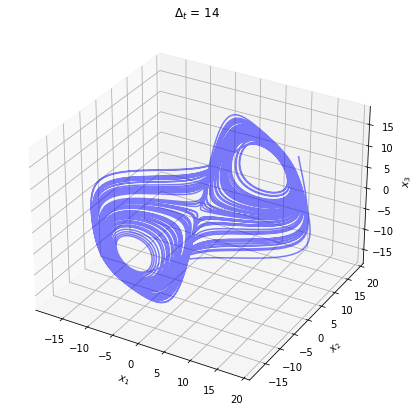

In [8]:
for i in range(1, 15):
    delta_T = i * 1  
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot(states[:len(states) - delta_T*2, 0], states[delta_T:len(states) - delta_T, 0], states[delta_T * 2:, 0], c="b", alpha=0.5)
    ax.set_title(f"$\Delta_t$ = {delta_T}")
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$x_3$')       

As we can see, by only using just one coordinate $x$, we can easily predict the whole behaviour of the attractor pretty closely. Except that we don't have a distance function which measures the distances between states. That's why we don't exactly match the diameter with our predictions, of the original curve. 

If we do the same, but this time using only the z coordinates, we cannot capture the embedding.

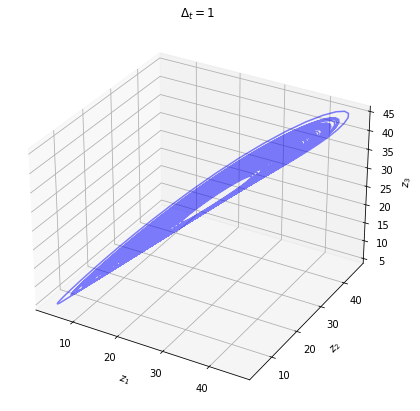

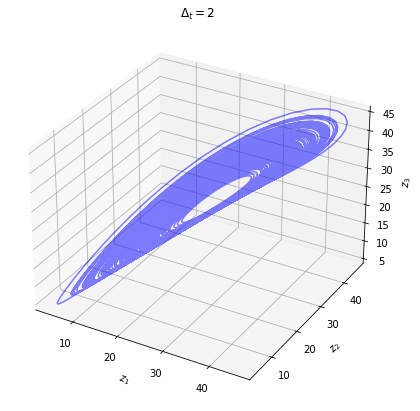

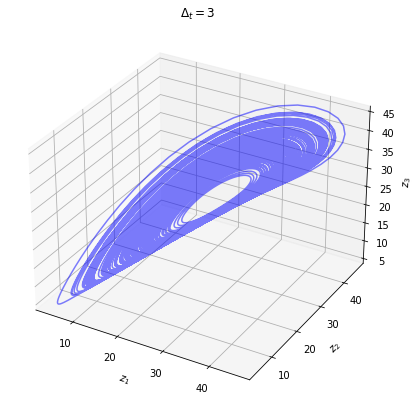

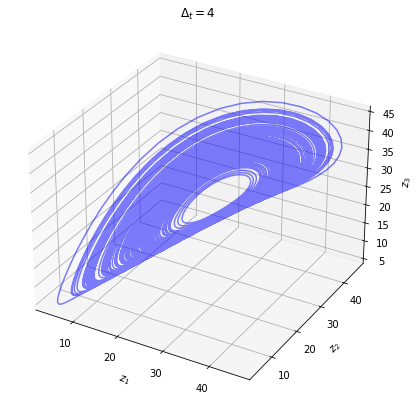

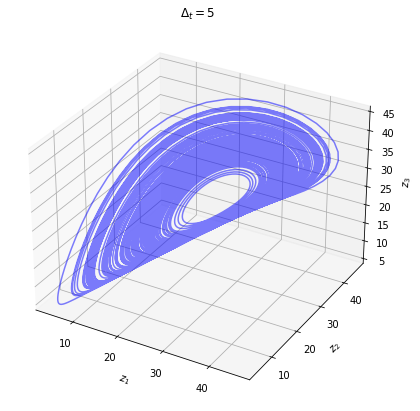

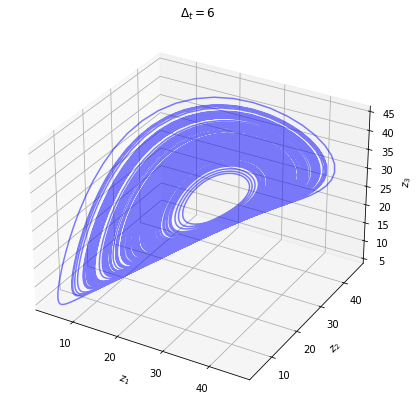

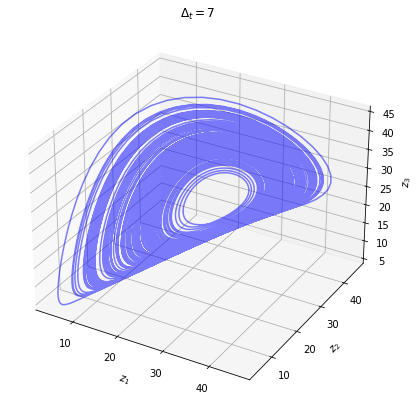

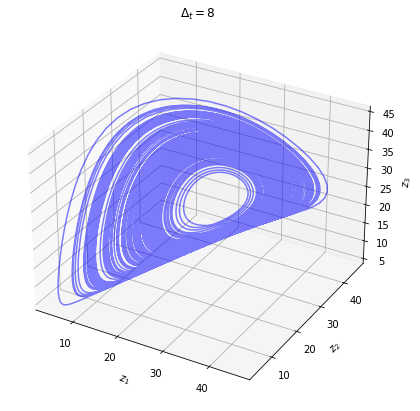

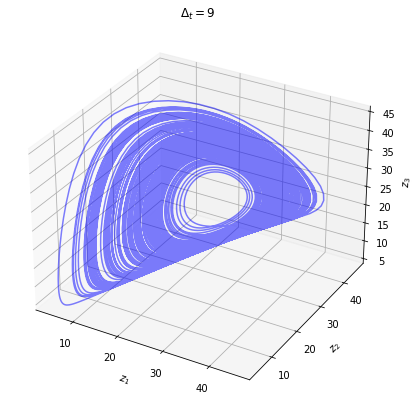

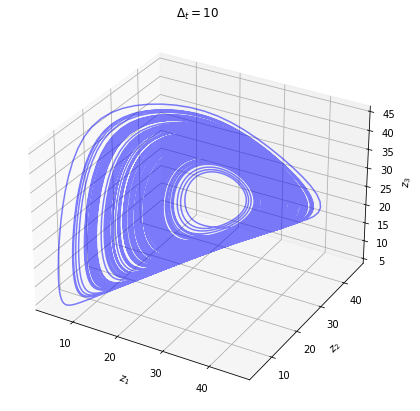

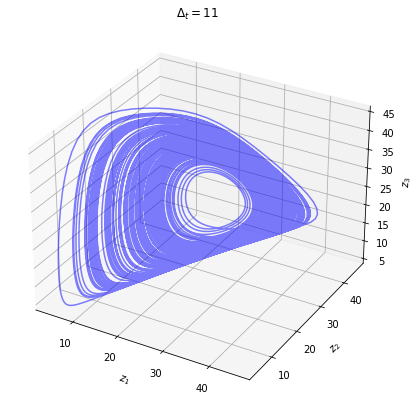

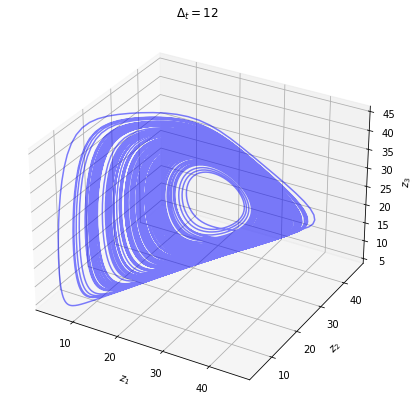

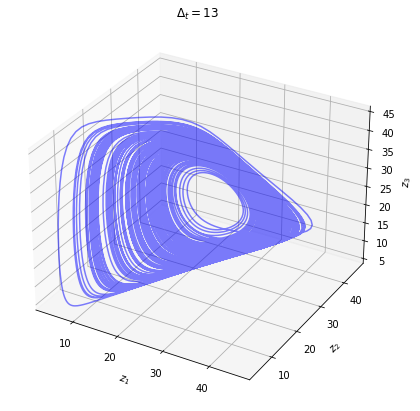

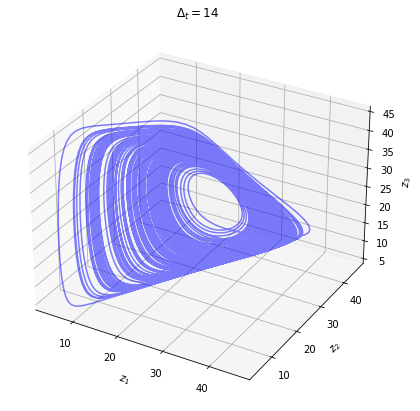

In [9]:
for i in range(1, 15):
    delta_T = i * 1  
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot(states[:len(states) - delta_T*2, 2], states[delta_T:len(states) - delta_T, 2], states[delta_T * 2:, 2], c="b", alpha=0.5)
    ax.set_title(f"$\Delta_t = {delta_T}$")
    ax.set_xlabel('$z_1$')
    ax.set_ylabel('$z_2$')
    ax.set_zlabel('$z_3$')